In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [13]:
training_data = datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root='./data', train=False, download=True,transform=ToTensor()
)

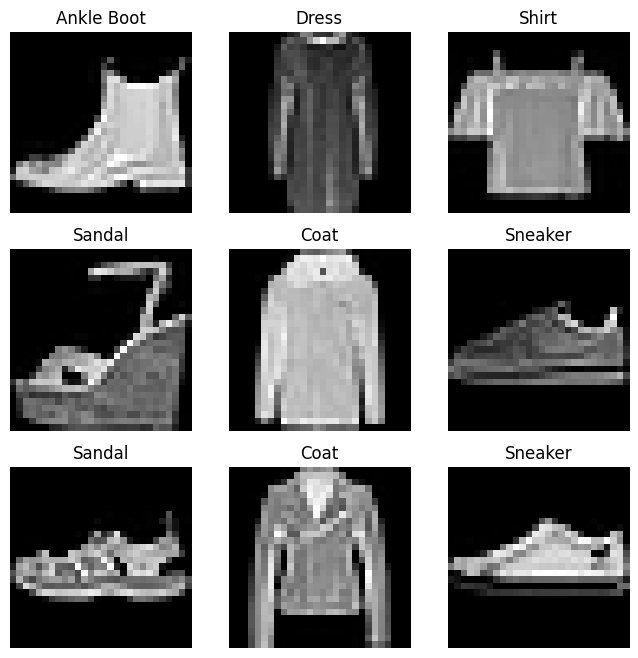

In [14]:
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",    
}
figure = plt.figure(figsize = (8,8))
cols, rows = 3,3
for i in range(1, cols*rows +1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [3]:
training_data = datasets.CIFAR100(
    root='./data', train=True, download=True, transform=ToTensor()
)
test_data = datasets.CIFAR100(
    root='./data', train=False, download=True,transform=ToTensor()
)

1.0%


KeyboardInterrupt: 

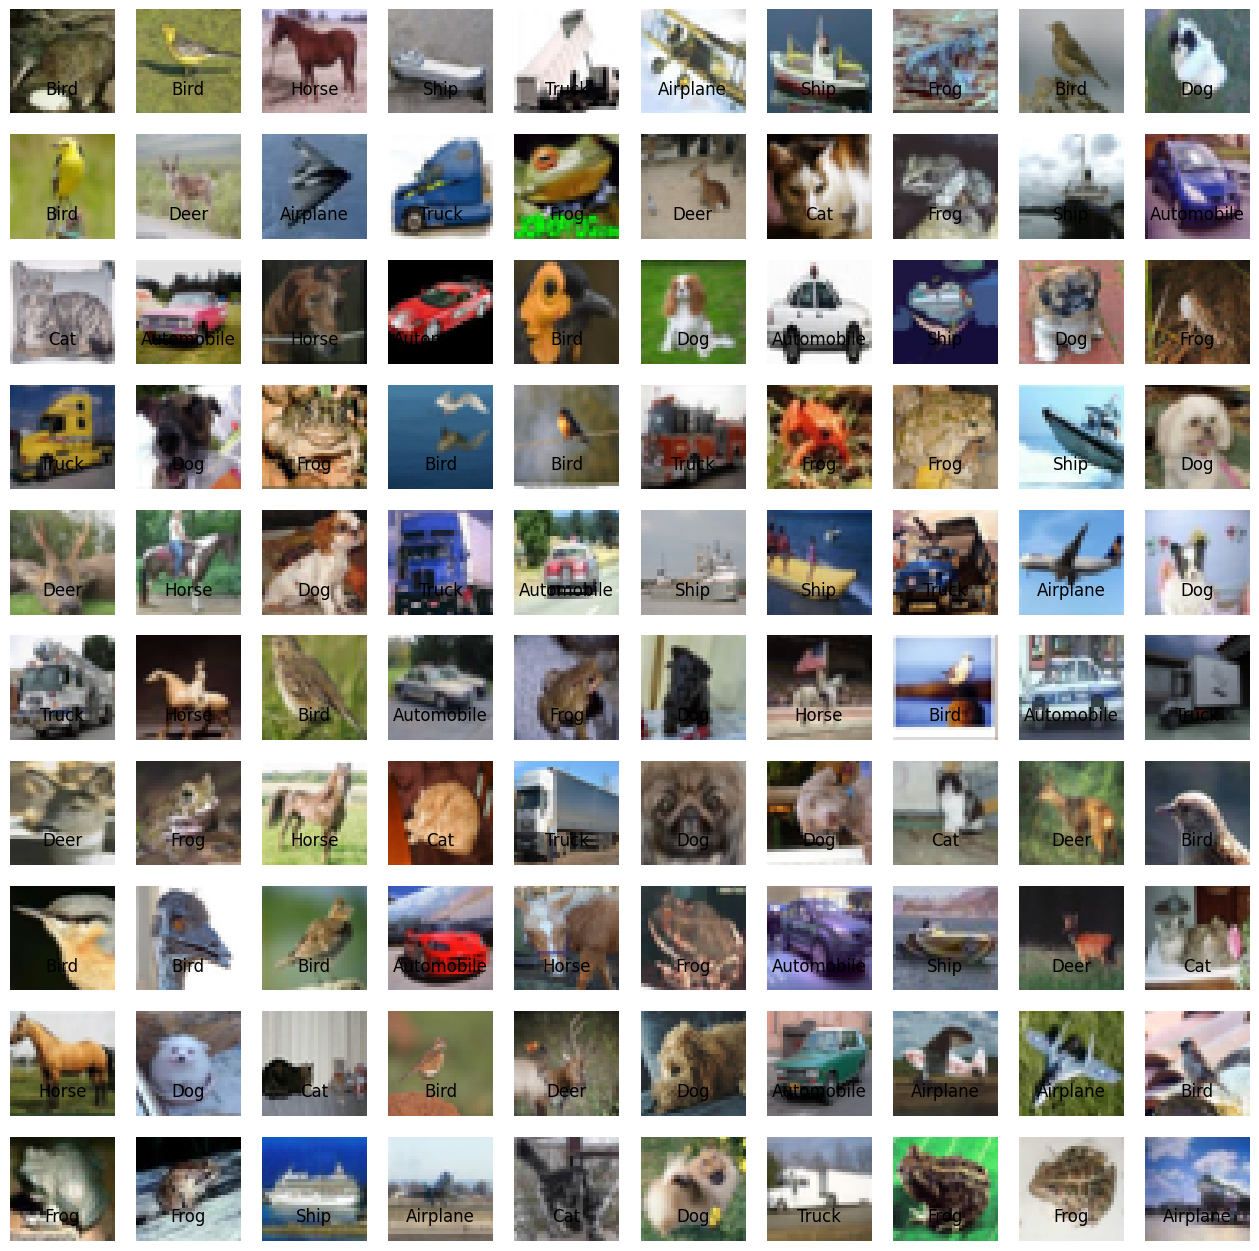

In [23]:
labels_map = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck",    
}
figure = plt.figure(figsize = (16,16))
cols, rows = 10,10
for i in range(1, cols*rows +1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
    img, label = training_data[sample_idx]
    img = img.permute(1,2,0) # (0 -channel, 1 -width, 2 -height) -> (1, 2, 0) 
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label], y = 0.11)
    plt.axis("off")
    plt.imshow(img)
plt.show()

In [13]:
import numpy as np

# 빈 딕셔너리 생성 직접 생성
data= dict()

# 32x32 배열을 1000개 생성 (0에서 1난수 생성)
data['x'] = np.random.rand(1000,32,32)
print(f"data : {data['x']}")

#0~9의 난수를 발생시키고 1000개 생성
data['y'] = np.random.randint(10, size =1000)
print(f"data : {data['y']}")

data : [[[0.88088121 0.36691268 0.51746573 ... 0.65143729 0.93108104 0.7766283 ]
  [0.93743375 0.17471641 0.28558379 ... 0.72177529 0.69830028 0.84458697]
  [0.1363105  0.02797337 0.4783516  ... 0.70126766 0.20289696 0.38770947]
  ...
  [0.08265705 0.96612541 0.23761117 ... 0.83971882 0.38460524 0.52760077]
  [0.04556417 0.96272092 0.89466712 ... 0.00621907 0.33804447 0.06647833]
  [0.20476476 0.53400173 0.87259547 ... 0.04892948 0.48879005 0.27930842]]

 [[0.38853919 0.07734537 0.99237036 ... 0.39300317 0.59889176 0.12097373]
  [0.64002314 0.83932563 0.30858401 ... 0.36165612 0.8549775  0.10498229]
  [0.56199531 0.06391372 0.47199653 ... 0.75705043 0.69328343 0.80284009]
  ...
  [0.63629269 0.12476534 0.90405394 ... 0.97423844 0.9235985  0.39536538]
  [0.80084103 0.21606326 0.30638045 ... 0.4788431  0.65340449 0.41737884]
  [0.60172635 0.90819718 0.31319372 ... 0.75438144 0.78150885 0.35129961]]

 [[0.21396795 0.08798859 0.66550256 ... 0.83330046 0.50975343 0.47582125]
  [0.13999752 0

In [36]:
class MyDataset(Dataset):
    def __init__(self, raw_data):
        self.x = torch.from_numpy(raw_data['x'])
        self.y = torch.from_numpy(raw_data['y'])
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        print("idx : {}".format(idx))
        return self.x[idx], self.y[idx]

In [44]:
class MyDataset2(Dataset):
    def __init__(self, raw_data):
        self.x = torch.from_numpy(raw_data['x'])
        self.y = torch.from_numpy(raw_data['y'])
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        print("idx : {}".format(idx))
        return self.x[idx], self.y[idx], len(self)

In [45]:
my_dataset = MyDataset(data)
for x, y in my_dataset:
    print(x, y)
    print(x.size())
    break

idx : 0
tensor([[0.8809, 0.3669, 0.5175,  ..., 0.6514, 0.9311, 0.7766],
        [0.9374, 0.1747, 0.2856,  ..., 0.7218, 0.6983, 0.8446],
        [0.1363, 0.0280, 0.4784,  ..., 0.7013, 0.2029, 0.3877],
        ...,
        [0.0827, 0.9661, 0.2376,  ..., 0.8397, 0.3846, 0.5276],
        [0.0456, 0.9627, 0.8947,  ..., 0.0062, 0.3380, 0.0665],
        [0.2048, 0.5340, 0.8726,  ..., 0.0489, 0.4888, 0.2793]],
       dtype=torch.float64) tensor(8, dtype=torch.int32)
torch.Size([32, 32])


In [50]:
my_dataset2 = MyDataset2(data)
for x, y, length in my_dataset2:
    print(x, y, length)
    break

idx : 0
tensor([[0.8809, 0.3669, 0.5175,  ..., 0.6514, 0.9311, 0.7766],
        [0.9374, 0.1747, 0.2856,  ..., 0.7218, 0.6983, 0.8446],
        [0.1363, 0.0280, 0.4784,  ..., 0.7013, 0.2029, 0.3877],
        ...,
        [0.0827, 0.9661, 0.2376,  ..., 0.8397, 0.3846, 0.5276],
        [0.0456, 0.9627, 0.8947,  ..., 0.0062, 0.3380, 0.0665],
        [0.2048, 0.5340, 0.8726,  ..., 0.0489, 0.4888, 0.2793]],
       dtype=torch.float64) tensor(8, dtype=torch.int32) 1000


In [56]:
my_list = [1, 2, 3, 4, 5]

# 리스트를 이터레이터로 변환
my_iterator = iter(my_list)

# 이터레이터에서 값을 가져오기
print(next(my_iterator))  # 1
print(next(my_iterator))  # 2
print(next(my_iterator))  # 3

for value in my_iterator:
    print(value)

1
2
3
4
5
